# Task 2_MOVIE RATING PREDICTION WITH PYTHON

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load and Clean the Data

In [ ]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1').dropna()
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [ ]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
df['Duration']=df['Duration'].str.extract('(\d+)').astype(int)
df['Votes']= df['Votes'].str.replace(',', '').astype(int)

# Create new columns

In [ ]:
df['Actor']= df[['Actor 1','Actor 2','Actor 3']].apply(', '.join, axis=1)
df['Directors']=df['Director'].astype('category').cat.codes
df['Genres']=df['Genre'].astype('category').cat.codes
df['Actors']=df['Actor'].astype('category').cat.codes

#Split the data

In [ ]:
Input= df.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)

In [ ]:
Output=df['Rating']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(Input, Output, test_size =0.2, random_state=1)

#Train and Evaluate Model and Visualize


In [ ]:
x_train['Year'] = x_train['Year'].apply(lambda x: float(x.replace('(', '').replace(')', '')))

In [ ]:
models = [RandomForestRegressor(n_estimators=100, random_state=1), DecisionTreeRegressor(random_state=1),
          XGBRegressor(n_estimators=100, random_state=1), LGBMRegressor(n_estimators=100, random_state=60),
          GradientBoostingRegressor(n_estimators=100, random_state=1),KNeighborsRegressor(n_neighbors=5)]

In [ ]:
x_test['Year'] = x_test['Year'].apply(lambda x: float(x.replace('(', '').replace(')', '')))

In [ ]:
model_names = []
accuracies = []
predictions = []

In [ ]:
for model in models:
  model.fit(x_train, y_train)
  pred= model.predict(x_test)
  accuracy=r2_score(y_test, pred)*100
  print(f'Model: {type(model).__name__}')
  print(f'Accuracy = {accuracy:.2f}%')
  print(f'Mean Squared Error = {mean_squared_error(y_test, pred, squared=False):.2f}\n')

  model_names.append(type(model).__name__)
  accuracies.append(accuracy)
  predictions.append(pred)

Model: RandomForestRegressor
Accuracy = 33.35%
Mean Squared Error = 1.11

Model: DecisionTreeRegressor
Accuracy = -28.61%
Mean Squared Error = 1.54

Model: XGBRegressor
Accuracy = 31.72%
Mean Squared Error = 1.12

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1207
[LightGBM] [Info] Number of data points in the train set: 4527, number of used features: 6
[LightGBM] [Info] Start training from score 5.910029
Model: LGBMRegressor
Accuracy = 38.03%
Mean Squared Error = 1.07

Model: GradientBoostingRegressor
Accuracy = 36.92%
Mean Squared Error = 1.08

Model: KNeighborsRegressor
Accuracy = -0.96%
Mean Squared Error = 1.37



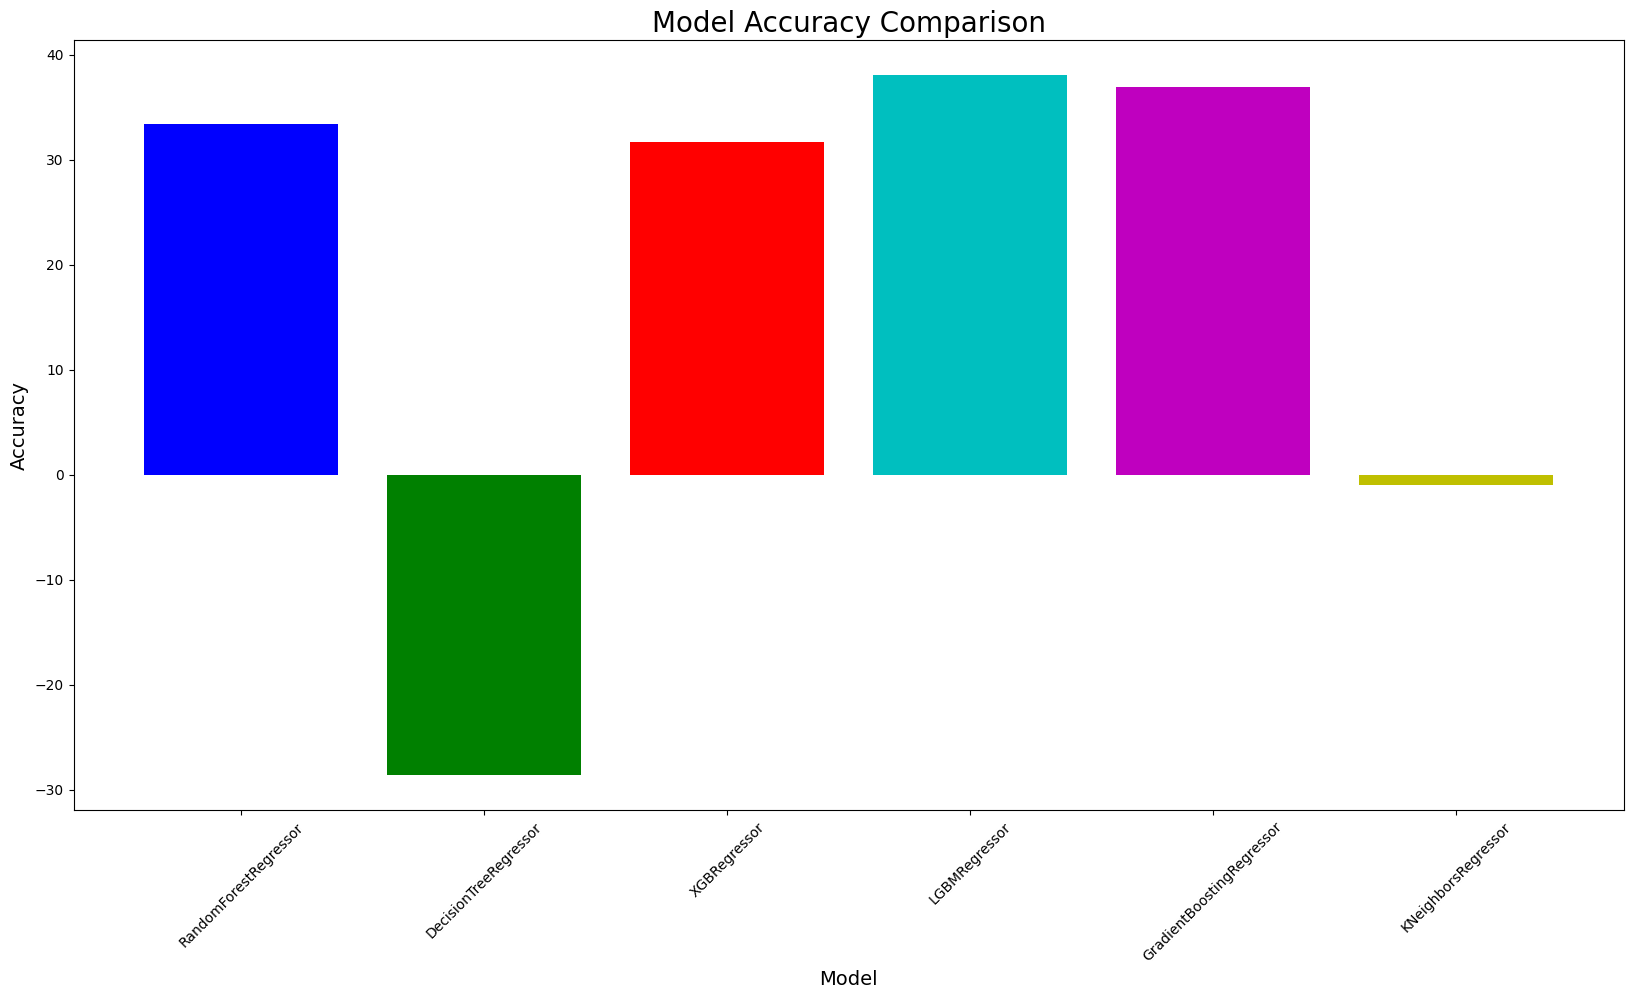

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(model_names, accuracies, color=['b','g','r', 'c', 'm', 'y'])
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.title('Model Accuracy Comparison', fontsize=20)
plt.show()

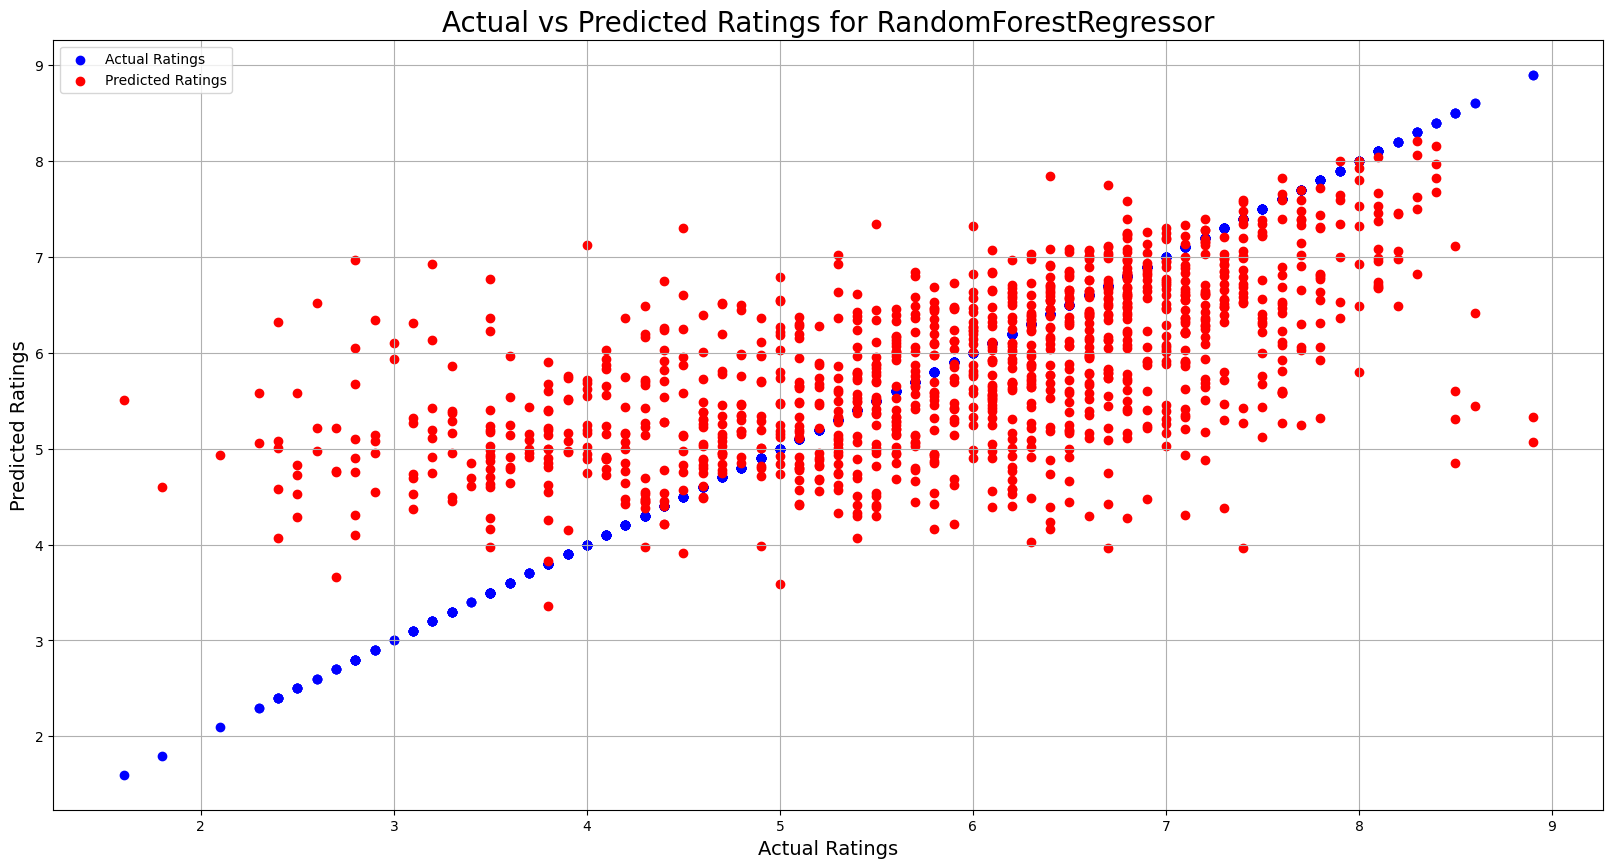

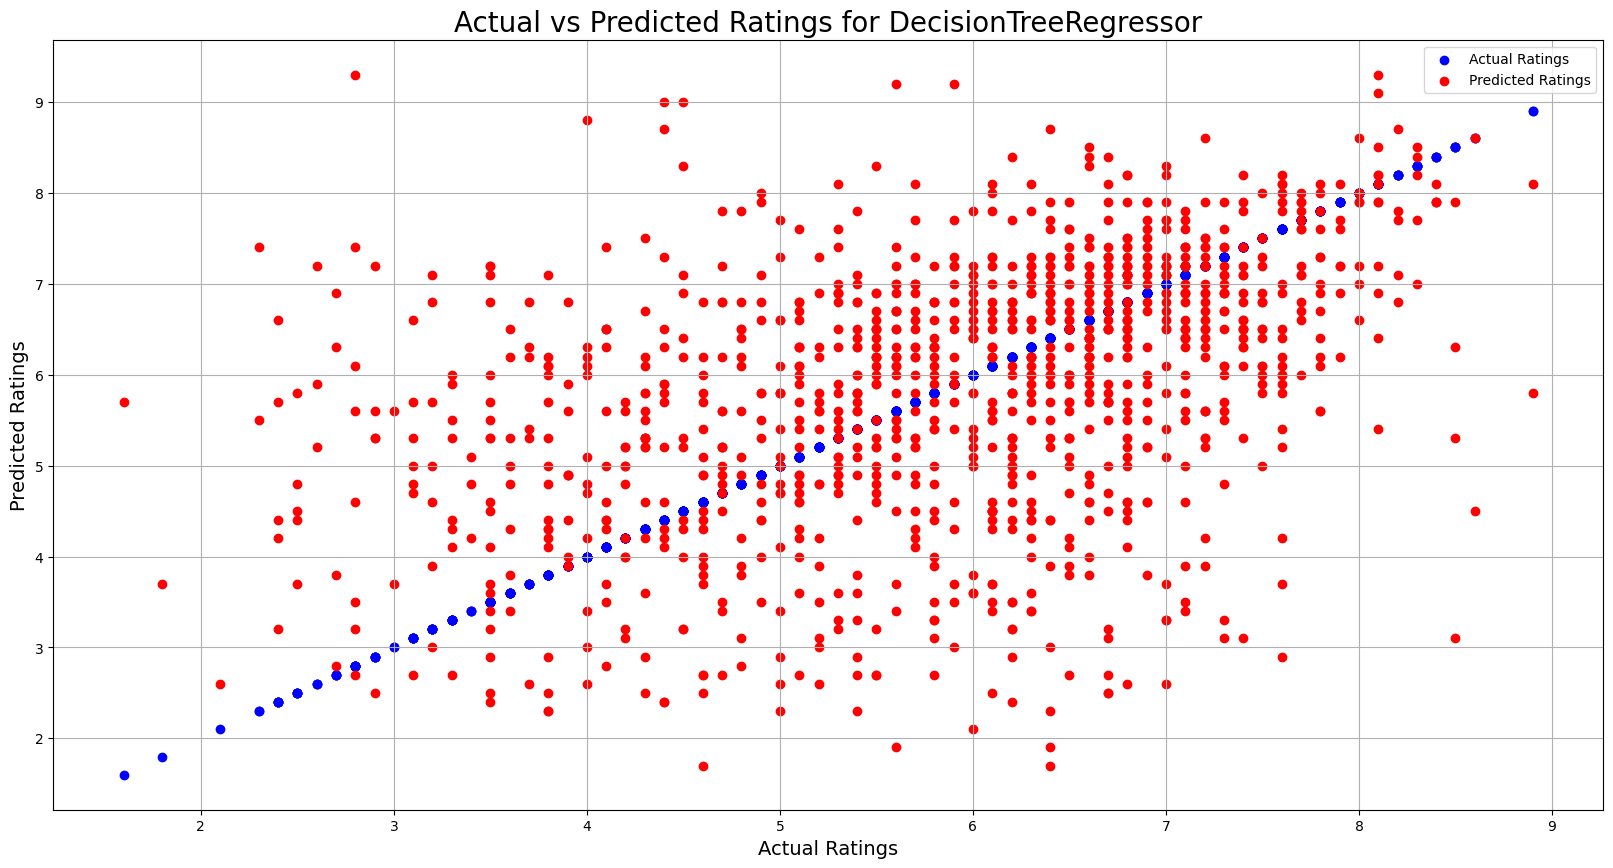

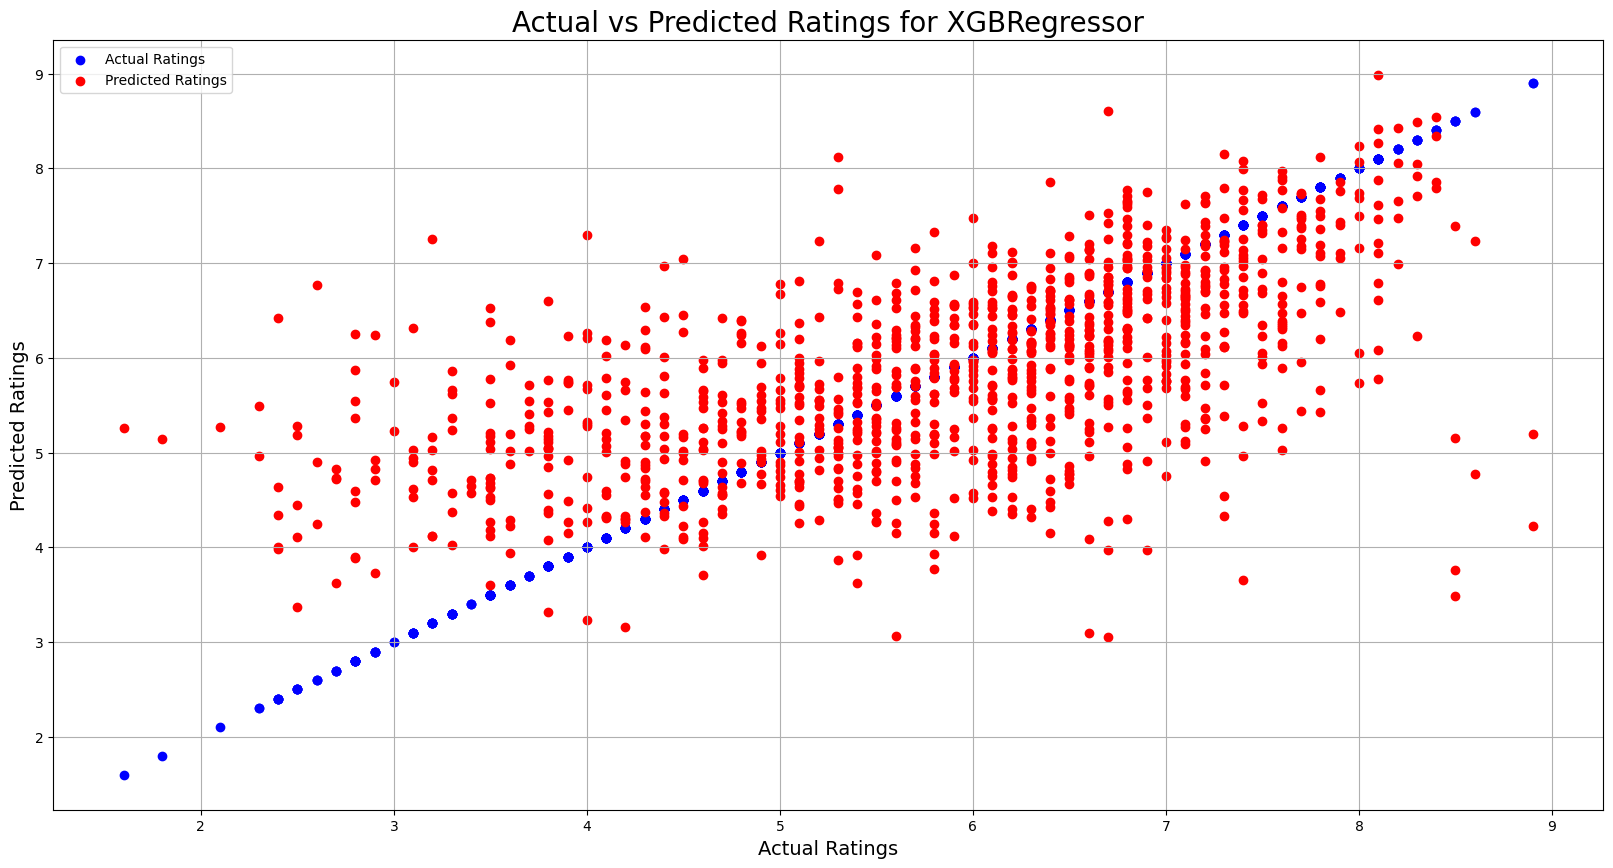

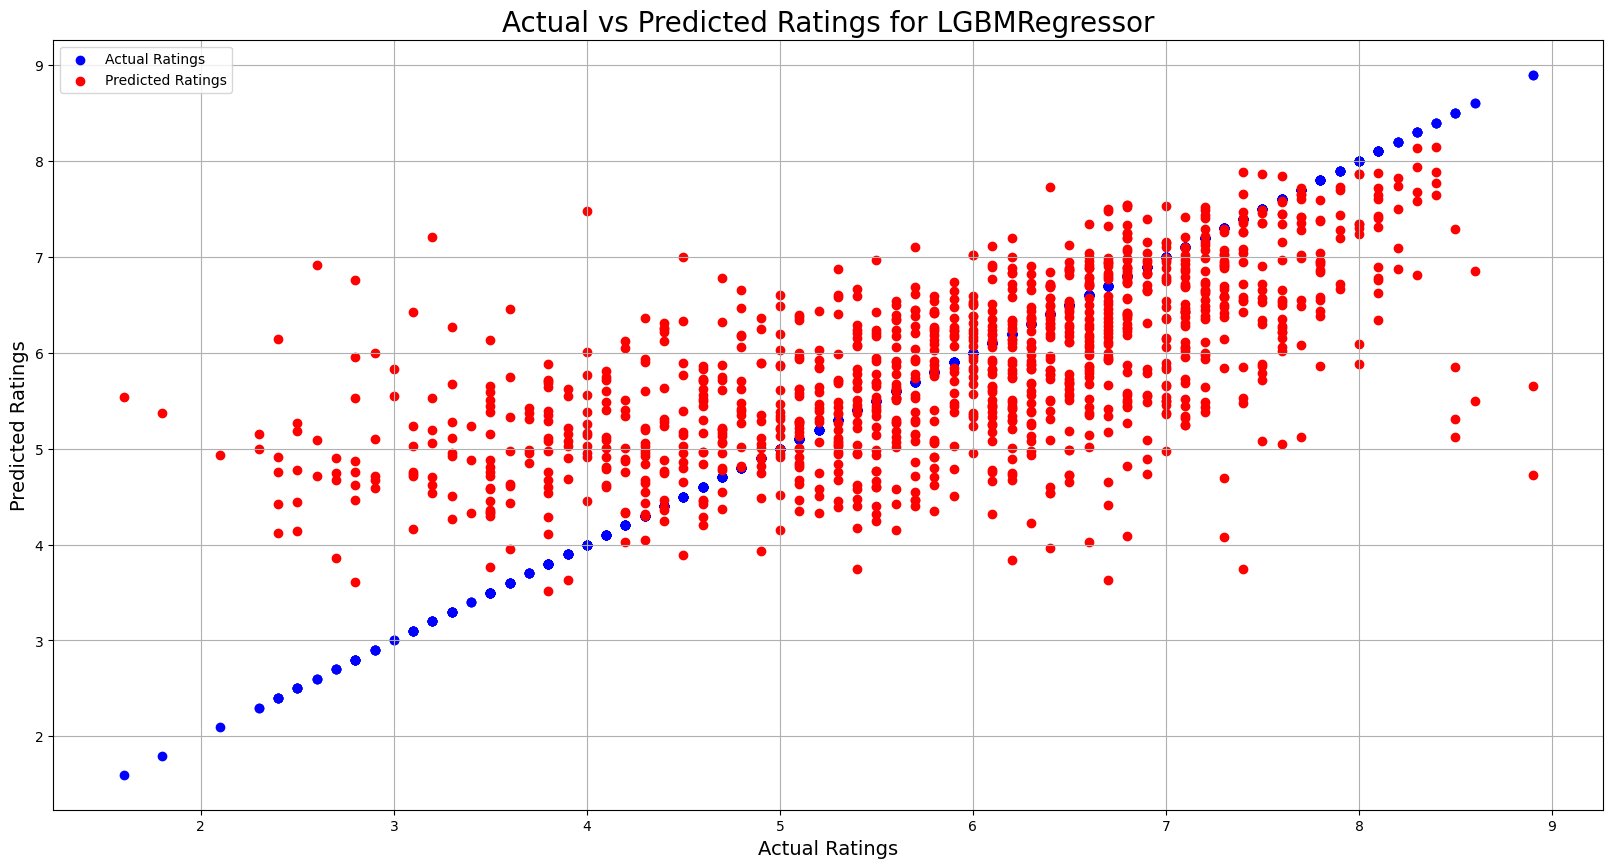

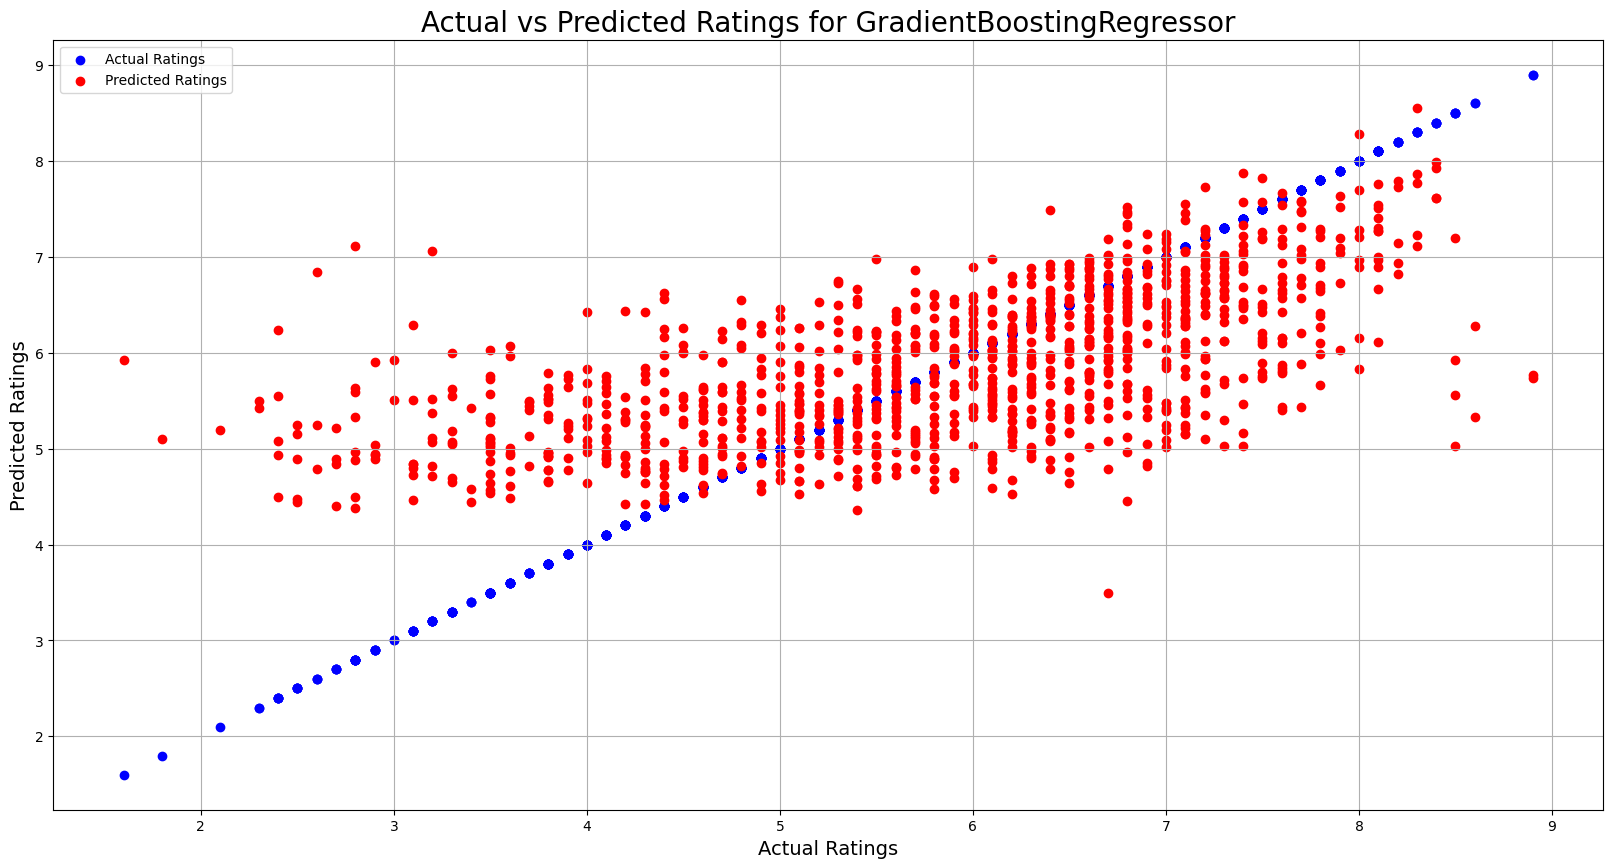

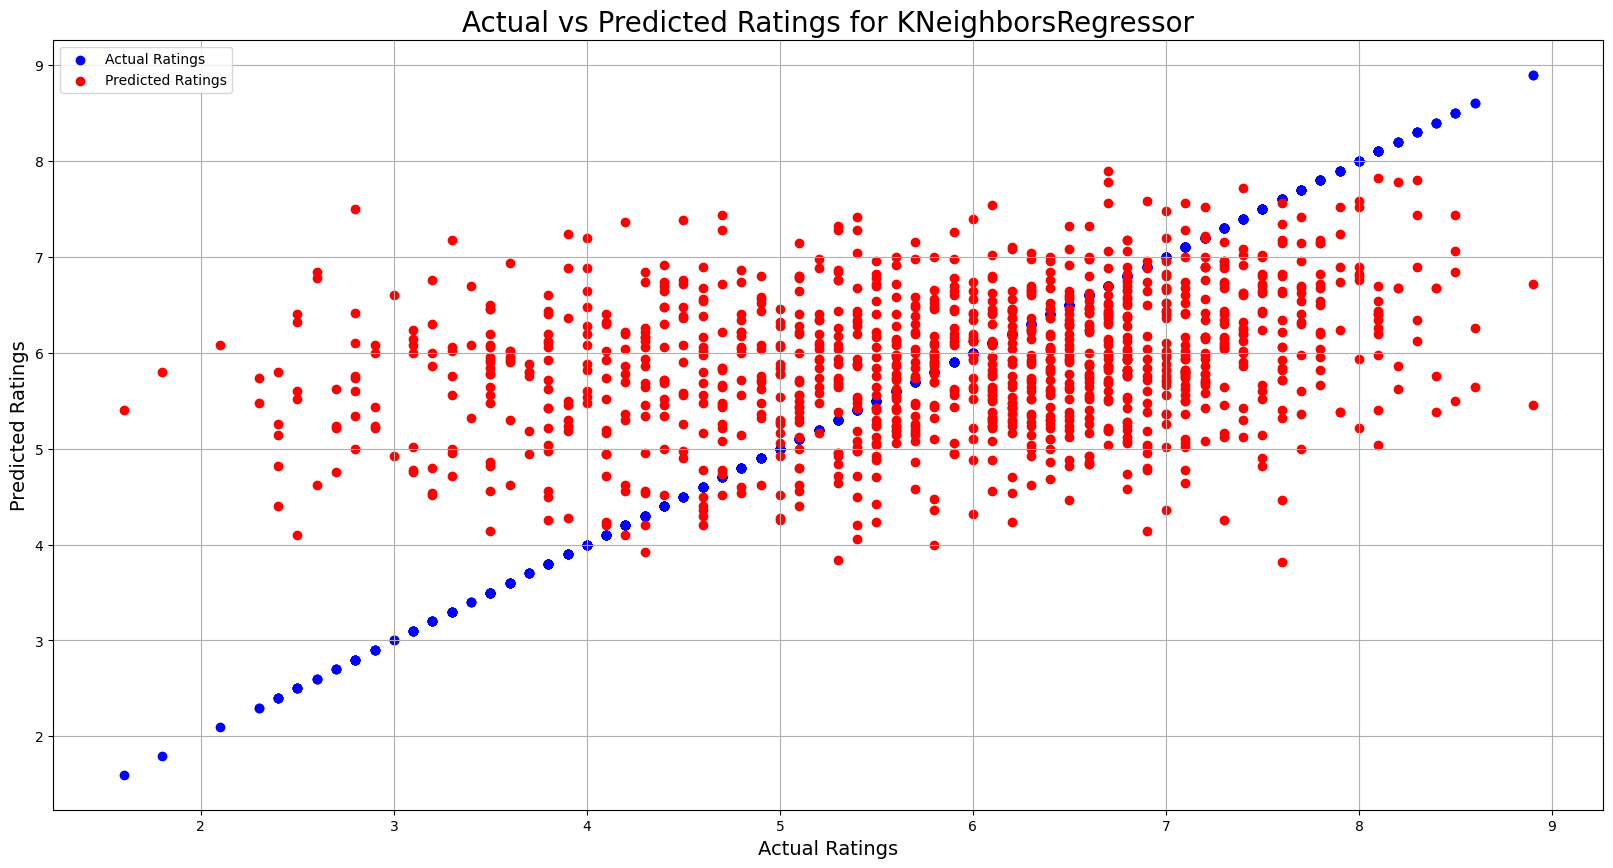

In [ ]:
for i in range(len(models)):
  plt.figure(figsize=(20,10))
  plt.grid(True)
  plt.scatter(y_test, y_test, color='blue', label='Actual Ratings')
  plt.scatter(y_test, predictions[i], color='red', label='Predicted Ratings')
  plt.xlabel('Actual Ratings', fontsize=14)
  plt.ylabel('Predicted Ratings', fontsize=14)
  plt.title(f'Actual vs Predicted Ratings for {model_names[i]}', fontsize=20)
  plt.legend()
  plt.show()